In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

print("Libraries imported successfully.")

# Load the dataset from the USGS URL
url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv'
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully.")
    print(f"Shape of the dataset: {df.shape}")
except Exception as e:
    print(f"Failed to load dataset. Error: {e}")

# Display the first few rows to see what the data looks like
print("\nFirst 5 rows of the dataset:")
print(df.head())

Libraries imported successfully.
Dataset loaded successfully.
Shape of the dataset: (11972, 22)

First 5 rows of the dataset:
                       time   latitude   longitude  depth   mag magType  \
0  2025-08-03T17:04:57.520Z  32.039000 -116.363000  11.78  2.02      ml   
1  2025-08-03T17:00:25.090Z  33.227000 -116.744667   8.88  2.47      ml   
2  2025-08-03T16:41:10.056Z  63.144600 -149.896600  81.20  1.40      ml   
3  2025-08-03T16:39:55.719Z  53.360300  161.519900  35.00  4.60      mb   
4  2025-08-03T16:34:24.450Z  35.588667 -117.391167   2.80  0.71      ml   

     nst    gap     dmin   rms  ...                   updated  \
0   19.0   83.0  0.28840  0.16  ...  2025-08-03T17:14:44.074Z   
1  103.0   13.0  0.01482  0.21  ...  2025-08-03T17:11:24.330Z   
2    NaN    NaN      NaN  0.43  ...  2025-08-03T16:43:26.686Z   
3   36.0  145.0  1.75900  0.90  ...  2025-08-03T17:06:19.040Z   
4   23.0   41.0  0.06718  0.17  ...  2025-08-03T16:38:00.462Z   

                                

In [20]:
import pandas as pd
file_path = '/content/drive/MyDrive/final diagram/all_month.csv'
df = pd.read_csv(file_path)
print(df.head())


                       time   latitude   longitude  depth   mag magType  \
0  2025-08-03T17:04:57.520Z  32.039000 -116.363000  11.78  2.02      ml   
1  2025-08-03T17:00:25.090Z  33.227000 -116.744667   8.88  2.47      ml   
2  2025-08-03T16:41:10.056Z  63.144600 -149.896600  81.20  1.40      ml   
3  2025-08-03T16:39:55.719Z  53.360300  161.519900  35.00  4.60      mb   
4  2025-08-03T16:34:24.450Z  35.588667 -117.391167   2.80  0.71      ml   

     nst    gap     dmin   rms  ...                   updated  \
0   19.0   83.0  0.28840  0.16  ...  2025-08-03T17:09:21.351Z   
1  103.0   13.0  0.01482  0.21  ...  2025-08-03T17:11:24.330Z   
2    NaN    NaN      NaN  0.43  ...  2025-08-03T16:43:26.686Z   
3   36.0  145.0  1.75900  0.90  ...  2025-08-03T17:06:19.040Z   
4   23.0   41.0  0.06718  0.17  ...  2025-08-03T16:38:00.462Z   

                                          place        type horizontalError  \
0                31 km NE of Ensenada, B.C., MX  earthquake            0.37   


In [ ]:


# Filter the data to only include events of type 'earthquake'
df_filtered = df[df['type'] == 'earthquake'].copy()

# Select relevant columns for our model
features = ['latitude', 'longitude', 'depth']
target = 'mag'
df_model = df_filtered[features + [target]].copy()

# Drop rows with missing values
df_model.dropna(inplace=True)

print("\nShape of the cleaned dataset:", df_model.shape)
print("Cleaned data sample:")
print(df_model.head())


Shape of the cleaned dataset: (11789, 4)
Cleaned data sample:
    latitude   longitude  depth   mag
0  32.039000 -116.363000  11.78  2.02
1  33.227000 -116.744667   8.88  2.47
2  63.144600 -149.896600  81.20  1.40
3  53.360300  161.519900  35.00  4.60
4  35.588667 -117.391167   2.80  0.71


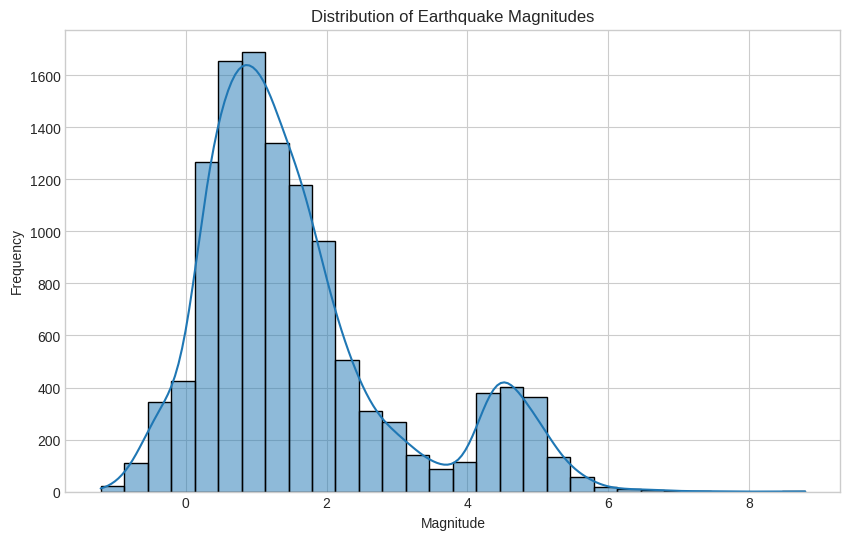

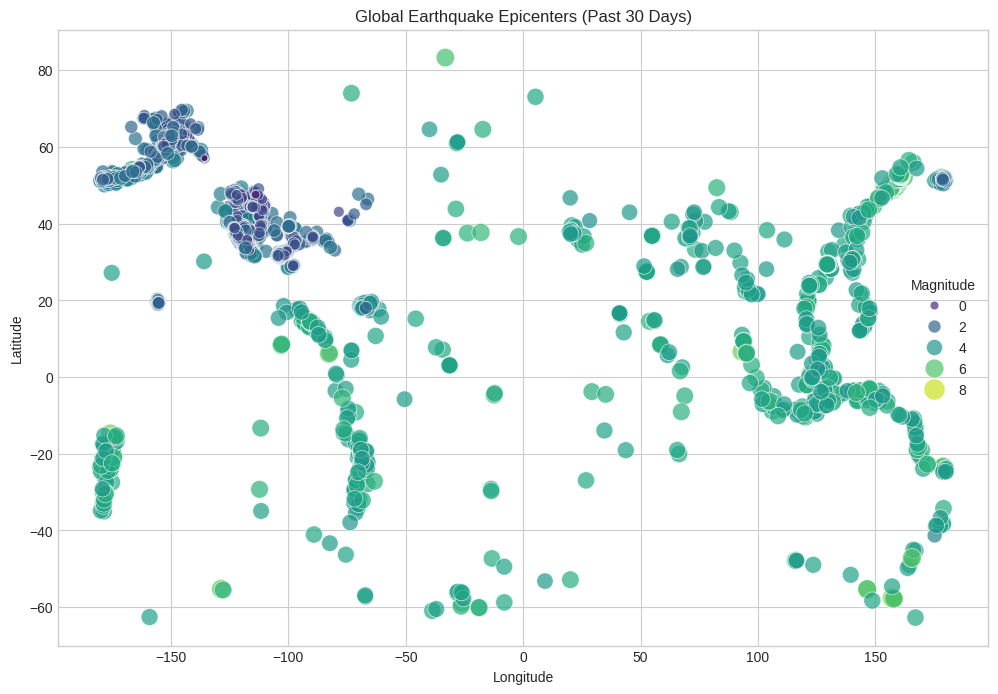

In [ ]:


plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Magnitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_model['mag'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Epicenter Map
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_model,
    hue='mag',
    palette='viridis',
    size='mag',
    sizes=(10, 250),
    alpha=0.7
)
plt.title('Global Earthquake Epicenters (Past 30 Days)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')
plt.show()

In [ ]:


# Define features (X) and target (y)
X = df_model[features]
y = df_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape[0]} samples")
print(f"Testing set size: {X_test_scaled.shape[0]} samples")

Training set size: 9431 samples
Testing set size: 2358 samples


In [ ]:


# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.



Model Evaluation Results:
Mean Absolute Error (MAE): 0.38
Root Mean Squared Error (RMSE): 0.53
R-squared (R²): 0.87


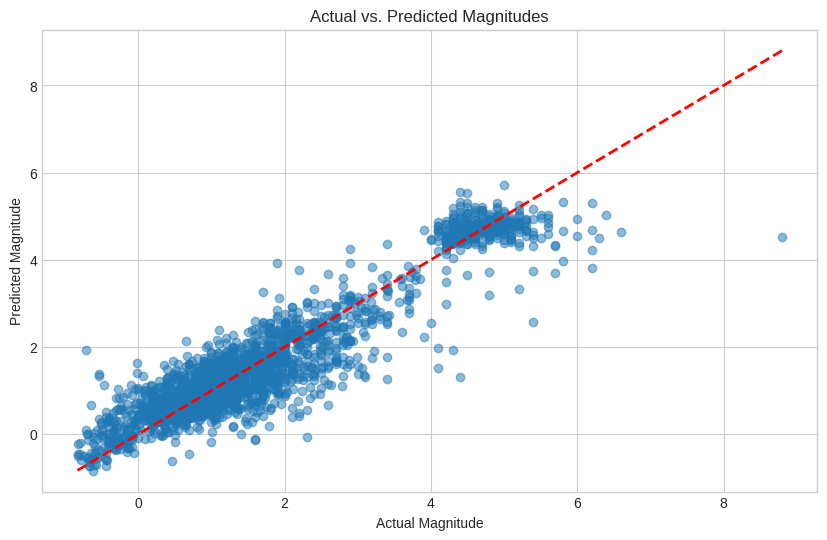

In [ ]:


# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
# Add a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.title('Actual vs. Predicted Magnitudes')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.show()